In [17]:
import pandas as pd

df_1= pd.read_csv("^KS11.csv")

In [18]:
df_1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,2022.229980,2031.790039,2015.680054,2026.160034,2026.160034,229900
1,2017-01-03,2034.310059,2044.069946,2028.469971,2043.969971,2043.969971,268100
2,2017-01-04,2046.290039,2046.290039,2040.609985,2045.640015,2045.640015,371500
3,2017-01-05,2045.520020,2046.500000,2039.489990,2041.949951,2041.949951,541300
4,2017-01-06,2048.110107,2051.840088,2045.660034,2049.120117,2049.120117,455400
...,...,...,...,...,...,...,...
1222,2021-12-24,3009.479980,3025.770020,3009.479980,3012.429932,3012.429932,537500
1223,2021-12-27,3013.939941,3017.310059,2999.300049,2999.550049,2999.550049,475000
1224,2021-12-28,3006.770020,3020.290039,2991.550049,3020.239990,3020.239990,607000
1225,2021-12-29,3002.899902,3007.719971,2988.669922,2993.290039,2993.290039,545800


In [19]:
'''코스피 등락률 구하기
1. 일간 변동률 계산 (전날 종가 - 오늘 종가)  / 전날 종가 * 100
2. 누적합계 '''

pd.options.display.float_format = '{:.1f}'.format

# 일간 변동률 계산

df_1['daily_change'] = (df_1['Adj Close'] - df_1['Adj Close'].shift(1))  / df_1['Adj Close'] * 100

In [20]:
# 누적 합계 계산
df_1['cumsum'] = df_1['daily_change'].cumsum()
df_1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_change,cumsum
1222,2021-12-24,3009.5,3025.8,3009.5,3012.4,3012.4,537500,0.5,32.2
1223,2021-12-27,3013.9,3017.3,2999.3,2999.6,2999.6,475000,-0.4,31.8
1224,2021-12-28,3006.8,3020.3,2991.6,3020.2,3020.2,607000,0.7,32.5
1225,2021-12-29,3002.9,3007.7,2988.7,2993.3,2993.3,545800,-0.9,31.6
1226,2021-12-30,2999.8,3005.4,2975.7,2977.6,2977.6,460600,-0.5,31.0


3. 실증 분석

사용된 입력변수(또는 독립변수)는 대표적인 기술적 지표인 SMA (simple moving average), EMA (exponential moving average),

stochastic D%, stochastic K%, RSI (relative strength index),
 MACD (moving average convergence
and divergence), 이격도 (disparity)이며

Table 3.1에서 보여주고 있다 (Shin 등, 2017).

그리고 출력변수 (또는 종속변수)는 연속형 자료인 KOSPI 200 주가지수 종가 (Close)이다.


슬라이딩 윈도우 방법론은 과거 데이터를 누적하여 다음 시점의 값을 예측 하는 방법이다 (Yahyia 등, 2015).


Table 3.5는 본 연구에서 이용한 자기회귀모형, LSTM 신경망, 그리고 XGBoost 모형의 테스트 기간 동안 정확도, 민감도, 특이도,
그리고 AUC 값들을 window size (h = 1, 5, 10, 20일)에 따라 비교한 표이다.
전통적인 시계열 모형인 자기회귀모형은 다른 기계학습 비교모형들보다 예측성과가 다소 저조한 것으로 나타났다.

이는 높은 복잡성과 비선형적인 특성을 가진 주식시장의 등락예측을 위해
전통적인 시계열모형보다 기계학습 모형들이 더 적합한 모형임을 보여주는 결과이다. 또한, 전반적으 로 XGBoost 모델의 예측성과가 LSTM 신경망의 예측성과보다 높은 것을 확인할 수 있었다. LSTM
신경망과 XGBoost 모형 모두 window size가 증가함에 따라 정확도가 높아짐을 확인할 수 있었다.


>>>>>

XGBoost모델이 주가 예측 에 있어서 가장 적합한 모형으로 선정되었다. 이를 통해 기존 연구들에서 시계열 데이터 예측에 있어 좋
은 성과를 보인다고 알려진 LSTM 신경망과 비교하여 XGBoost 모형 또한 충분히 유용한 적용 모형이
될 수 있음을 확인할 수 있었다. 따라서 XGBoost 모형을 주가 데이터에 적용하여 여러 하이퍼파라미터
들을 잘 도출할 수 있다면, 주식시장 분석에 있어 효율적인 모형으로 평가받을 수 있을 것이다

---


In [21]:
'''

TA-lib으로 기술적 지표 구현하기


MACD는 두 지수 이동 평균(EMA)인 장기 및 단기 기간 사이의 차이를 계산합니다.

ta-lib의 MACD 지표 구현은 네 가지 입력값을 갖습니다:
- 종가(close price)
- `fastperiod`: 단기 EMA 기간
- `slowperiod`: 장기 EMA 기간
- `signalperiod`: MACD 자체의 EMA 기간

세 가지 출력값을 갖습니다:
- `macd`: 빠른 EMA와 느린 EMA 사이의 차이입니다.
- `macdsignal`: `signalperiod` 기간으로 MACD 값의 EMA입니다.
- `macdhist`: `macd`와 `macdsignal` 사이의 차이를 계산합니다.

'''

'\n\nTA-lib으로 기술적 지표 구현하기\n\n\nMACD는 두 지수 이동 평균(EMA)인 장기 및 단기 기간 사이의 차이를 계산합니다.\n\nta-lib의 MACD 지표 구현은 네 가지 입력값을 갖습니다:\n- 종가(close price)\n- `fastperiod`: 단기 EMA 기간\n- `slowperiod`: 장기 EMA 기간\n- `signalperiod`: MACD 자체의 EMA 기간\n\n세 가지 출력값을 갖습니다:\n- `macd`: 빠른 EMA와 느린 EMA 사이의 차이입니다.\n- `macdsignal`: `signalperiod` 기간으로 MACD 값의 EMA입니다.\n- `macdhist`: `macd`와 `macdsignal` 사이의 차이를 계산합니다.\n\n'

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# colab에서 talib 설치
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2023-08-14 10:12:12--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-14 10:12:12--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-14 10:12:12--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from talib import RSI, BBANDS, MACD

In [24]:

sns.set_style('whitegrid')
idx = pd.IndexSlice

In [25]:
df_1.Date = pd.to_datetime(df_1.Date) # Change data type of 'Date'
df_1 = df_1.set_index('Date') # Set index

In [28]:
macd, macdsignal, macdhist = MACD(df_1.Close, fastperiod=12, slowperiod=26, signalperiod=9)

In [29]:
up, mid, low = BBANDS(df_1.Close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

In [30]:
rsi = RSI(df_1.Close, timeperiod=14)

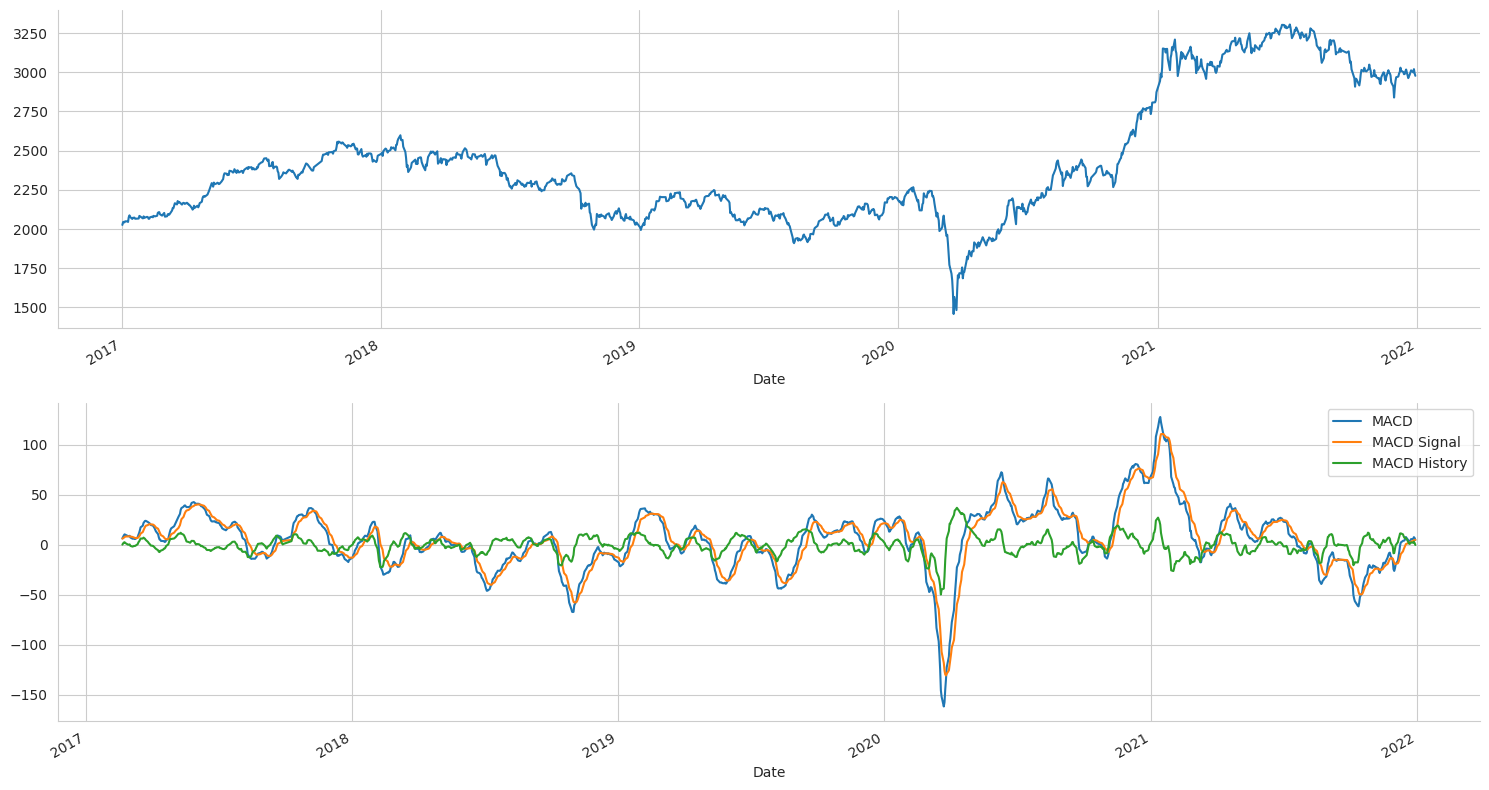

In [31]:

macd_data = pd.DataFrame({'KS': df_1.Close, 'MACD': macd, 'MACD Signal': macdsignal, 'MACD History': macdhist})

fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
macd_data.KS.plot(ax=axes[0])
macd_data.drop('KS', axis=1).plot(ax=axes[1])
fig.tight_layout()
sns.despine();

In [38]:
data = pd.DataFrame({'KS': df_1.Close, 'BB Up': up, 'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})
data

,KS,BB Up,BB Mid,BB down,RSI,MACD
Date,,,,,,
2017-01-02,2026.2,NaN,NaN,NaN,NaN,NaN
2017-01-03,2044.0,NaN,NaN,NaN,NaN,NaN
2017-01-04,2045.6,NaN,NaN,NaN,NaN,NaN
2017-01-05,2041.9,NaN,NaN,NaN,NaN,NaN
2017-01-06,2049.1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-24,3012.4,3063.0,2973.4,2883.8,55.0,5.7
2021-12-27,2999.6,3065.0,2976.4,2887.7,52.5,5.9
2021-12-28,3020.2,3066.8,2981.7,2896.5,56.0,7.7


In [39]:
dataframe = pd.concat([df_1, data], axis=1)

In [40]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1227 entries, 2017-01-02 to 2021-12-30
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1227 non-null   float64
 1   High          1227 non-null   float64
 2   Low           1227 non-null   float64
 3   Close         1227 non-null   float64
 4   Adj Close     1227 non-null   float64
 5   Volume        1227 non-null   int64  
 6   daily_change  1226 non-null   float64
 7   cumsum        1226 non-null   float64
 8   KS            1227 non-null   float64
 9   BB Up         1207 non-null   float64
 10  BB Mid        1207 non-null   float64
 11  BB down       1207 non-null   float64
 12  RSI           1213 non-null   float64
 13  MACD          1194 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 143.8 KB


In [ ]:
data.tail()

,KS,BB Up,BB Mid,BB down,RSI,MACD
Date,,,,,,
2021-12-24,3012.4,3063.0,2973.4,2883.8,55.0,5.7
2021-12-27,2999.6,3065.0,2976.4,2887.7,52.5,5.9
2021-12-28,3020.2,3066.8,2981.7,2896.5,56.0,7.7
2021-12-29,2993.3,3045.5,2989.0,2932.5,50.7,6.8
2021-12-30,2977.6,3033.2,2992.7,2952.2,47.9,4.9


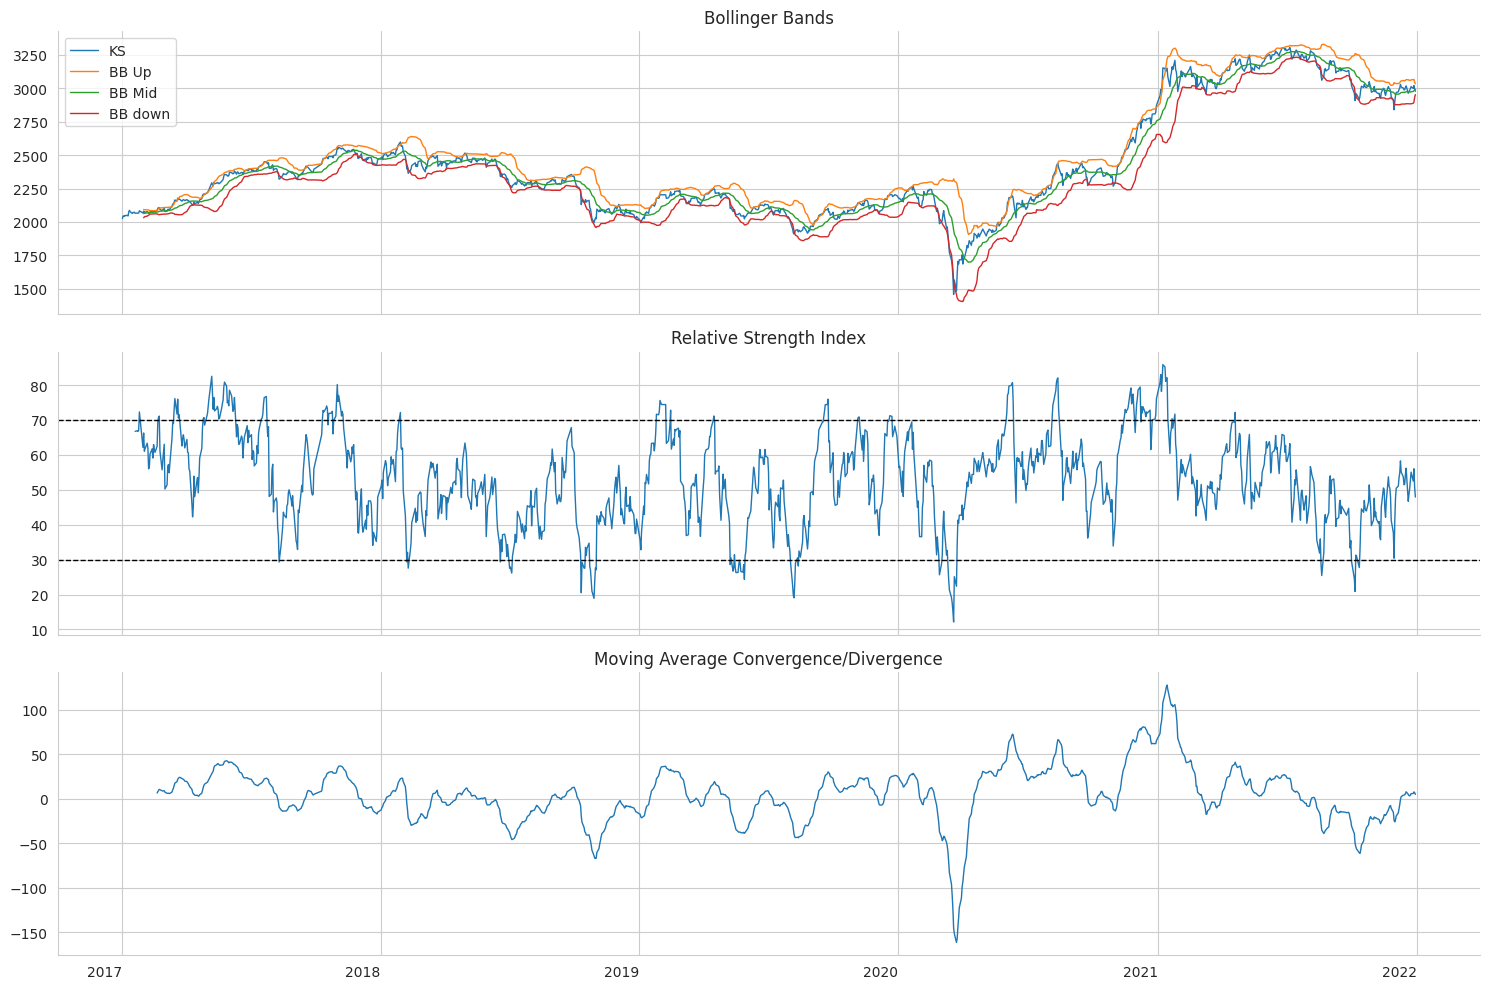

In [42]:
fig, axes= plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
data.MACD.plot(ax=axes[2], lw=1, title='Moving Average Convergence/Divergence', rot=0)
axes[2].set_xlabel('')
fig.tight_layout()
sns.despine();

# How to use the Kalman Filter and Wavelets
- pykalman을 이용한 칼만 필터의 적용법
## Kalman Filter
회귀선이 시간에 따라 조정되는 현상을 시각적으로 나타낼 수 있다.

In [2]:
!pip install pykalman

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48444 sha256=9d1240f9dde9e38564e13622513acd1c02422c4459617a7de06865fba39c5df3
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


In [43]:
%matplotlib inline

from datetime import datetime
import itertools

import pandas as pd
import pandas_datareader.data as web
from pykalman import KalmanFilter
import pywt

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [45]:
import pandas as pd

df= pd.read_csv("^KS11.csv")

df.set_index('Date', inplace=True)
df = df.loc[:,'Close']

In [46]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [47]:
state_means, _ = kf.filter(df)

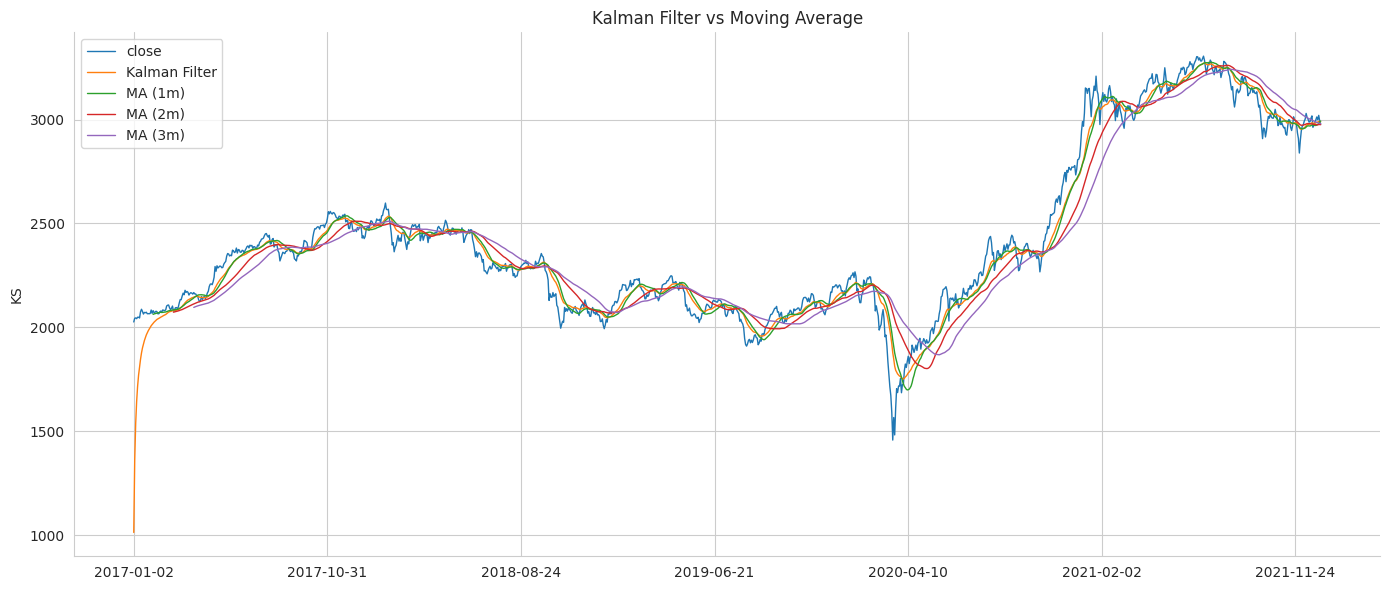

In [48]:
df_smoothed = df.to_frame('close')
df_smoothed['Kalman Filter'] = state_means
for months in [1,2,3]:
    df_smoothed[f'MA ({months}m)'] = df.rolling(window=months*21).mean()

ax = df_smoothed.plot(title='Kalman Filter vs Moving Average', figsize=(14,6), lw=1, rot=0)
ax.set_xlabel('')
ax.set_ylabel('KS')
plt.tight_layout()
sns.despine();

In [57]:
dataframe = pd.concat([dataframe, df_smoothed['Kalman Filter']], axis=1)
dataframe
#날짜 중복됐음...

,Open,High,Low,Close,Adj Close,Volume,daily_change,cumsum,KS,BB Up,BB Mid,BB down,RSI,MACD,Kalman Filter,Kalman Filter
Date,,,,,,,,,,,,,,,,
2017-01-02 00:00:00,2022.2,2031.8,2015.7,2026.2,2026.2,229900.0,NaN,NaN,2026.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 00:00:00,2034.3,2044.1,2028.5,2044.0,2044.0,268100.0,0.9,0.9,2044.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 00:00:00,2046.3,2046.3,2040.6,2045.6,2045.6,371500.0,0.1,1.0,2045.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 00:00:00,2045.5,2046.5,2039.5,2041.9,2041.9,541300.0,-0.2,0.8,2041.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06 00:00:00,2048.1,2051.8,2045.7,2049.1,2049.1,455400.0,0.3,1.1,2049.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2986.6,2986.6
2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2987.8,2987.8
2021-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2990.9,2990.9


#이 밑으로는 wavlet으로 잡음 없애기 (참고용)

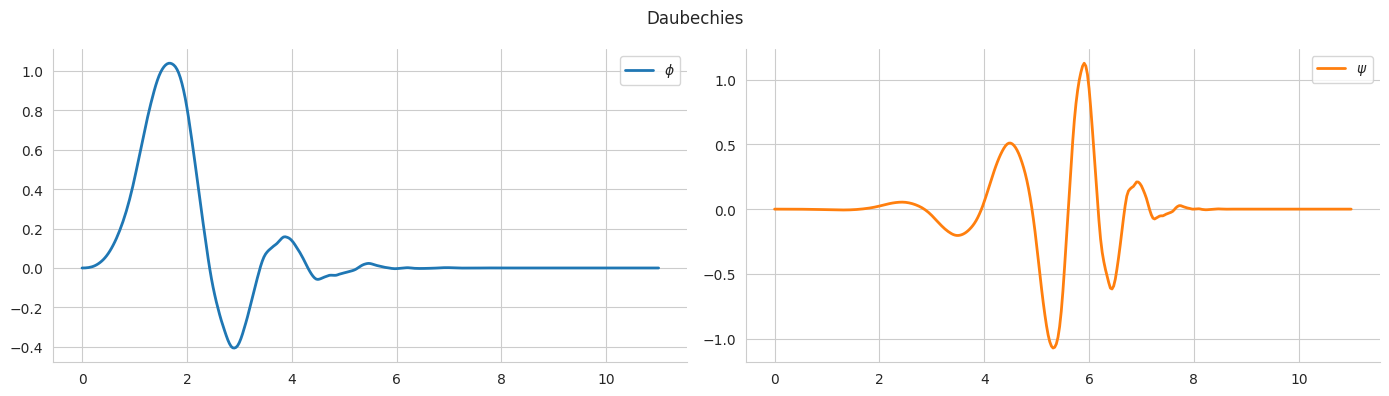

In [49]:
wavelet = pywt.Wavelet('db6')
phi, psi, x = wavelet.wavefun(level=5)
df = pd.DataFrame({'$\phi$': phi, '$\psi$': psi}, index=x)
df.plot(title='Daubechies', subplots=True, layout=(1, 2), figsize=(14, 4), lw=2, rot=0)
plt.tight_layout()
sns.despine();

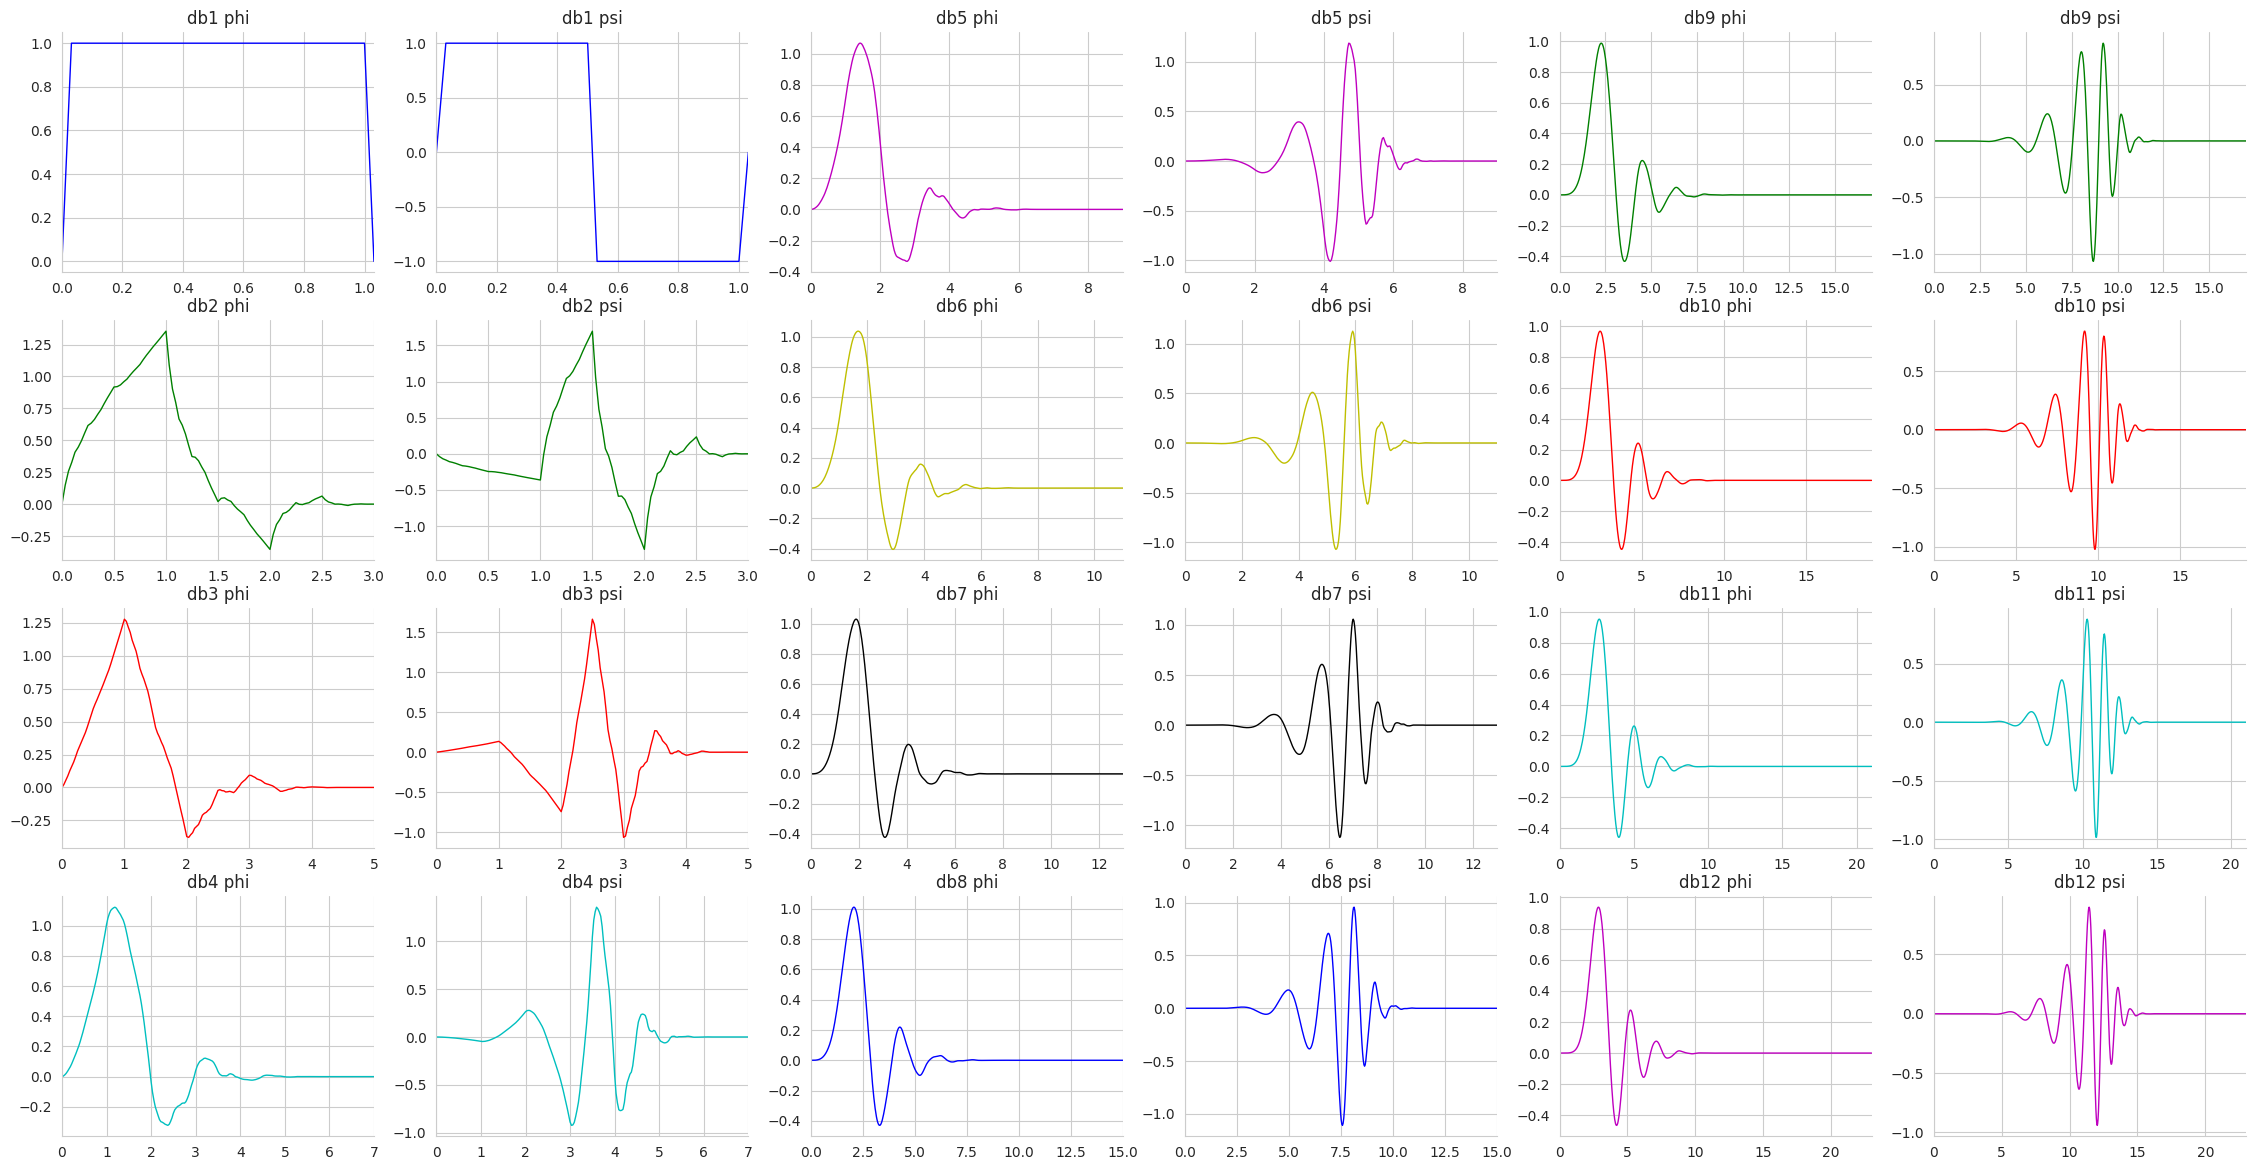

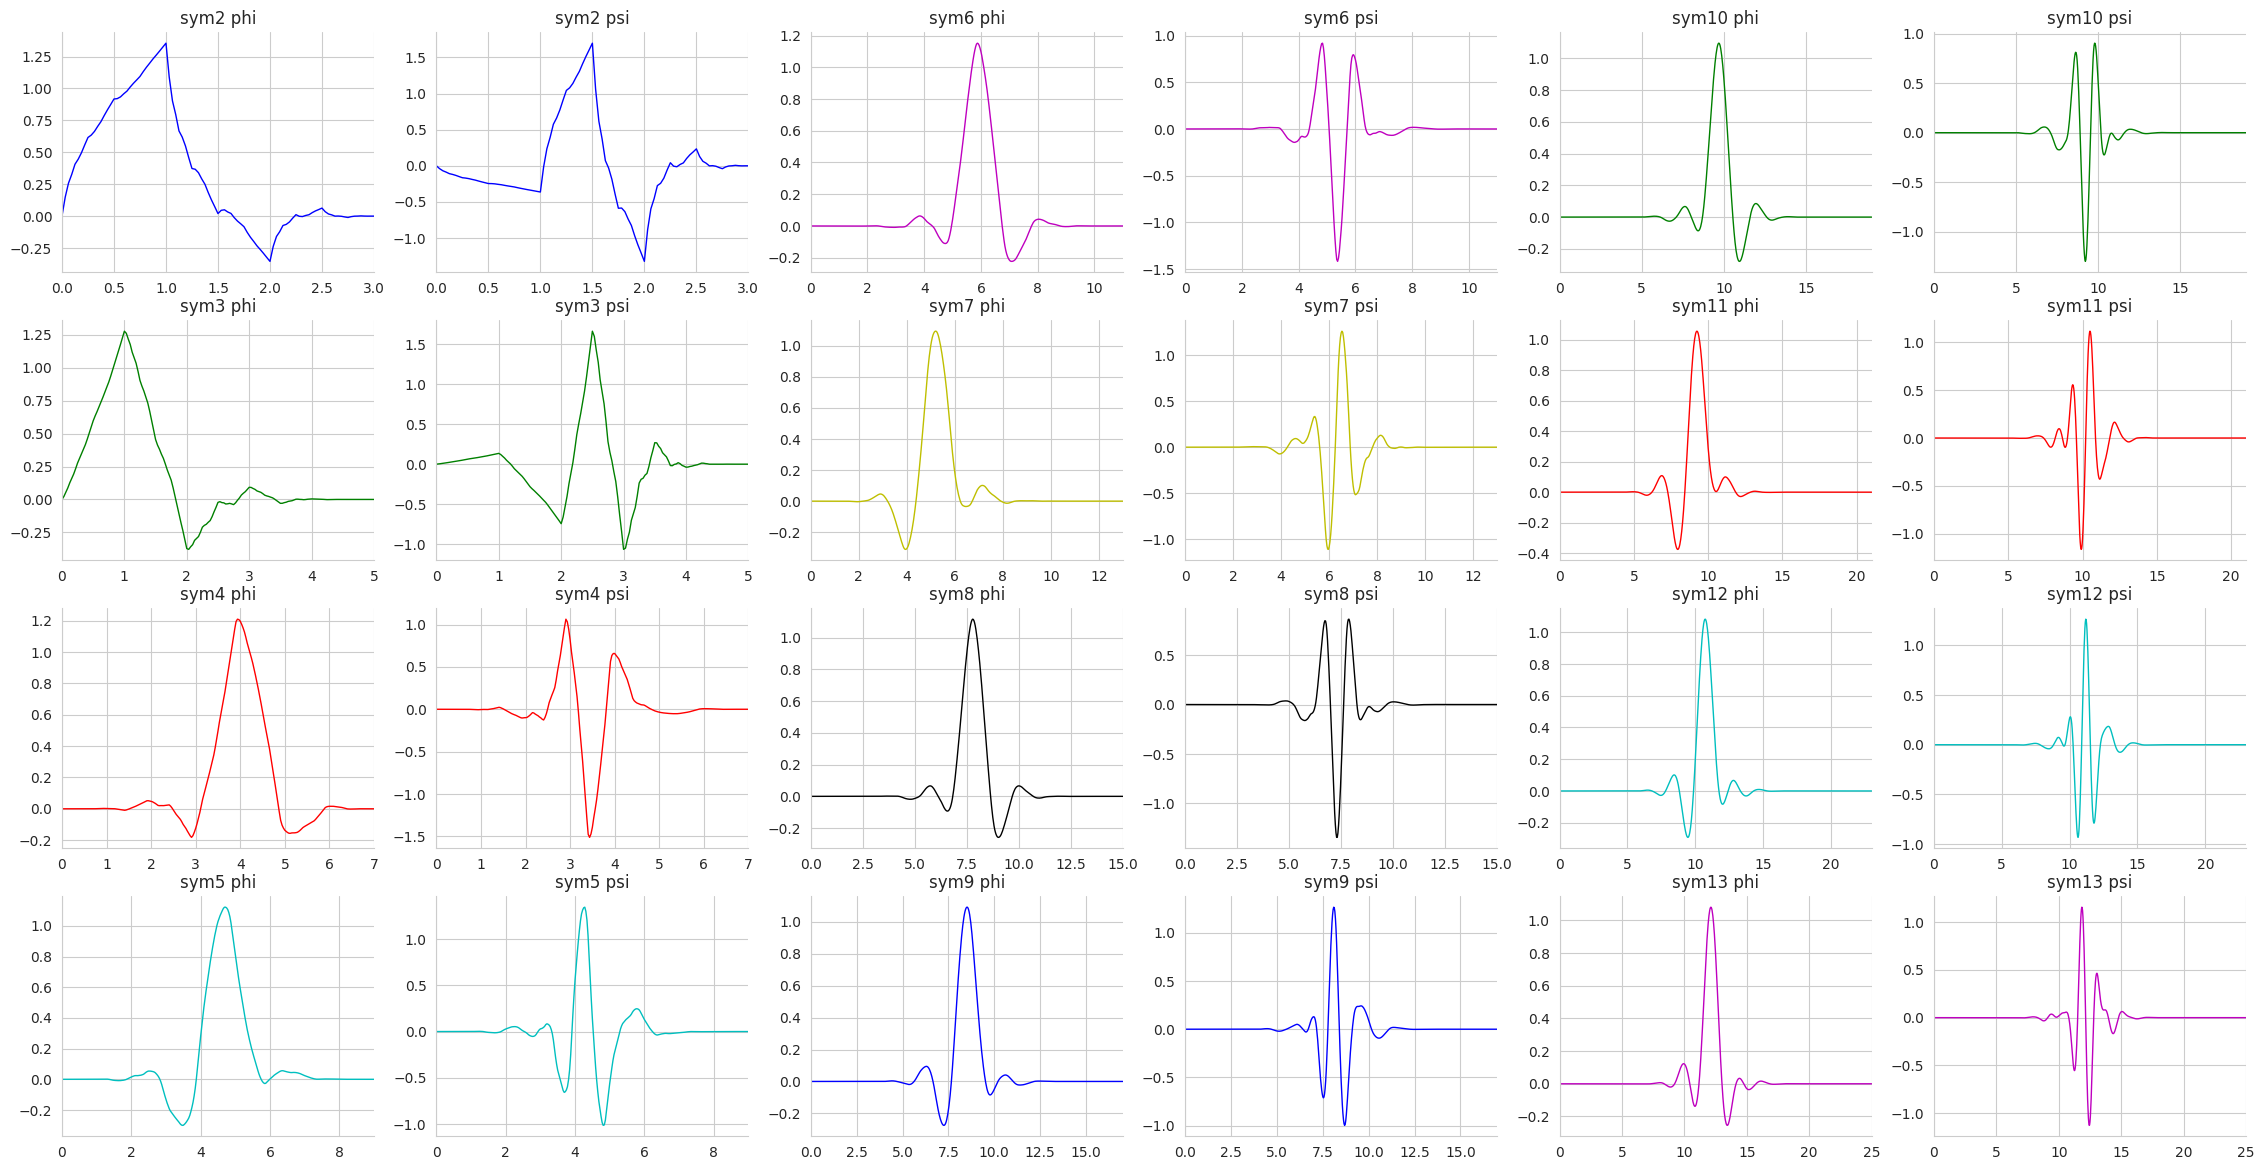

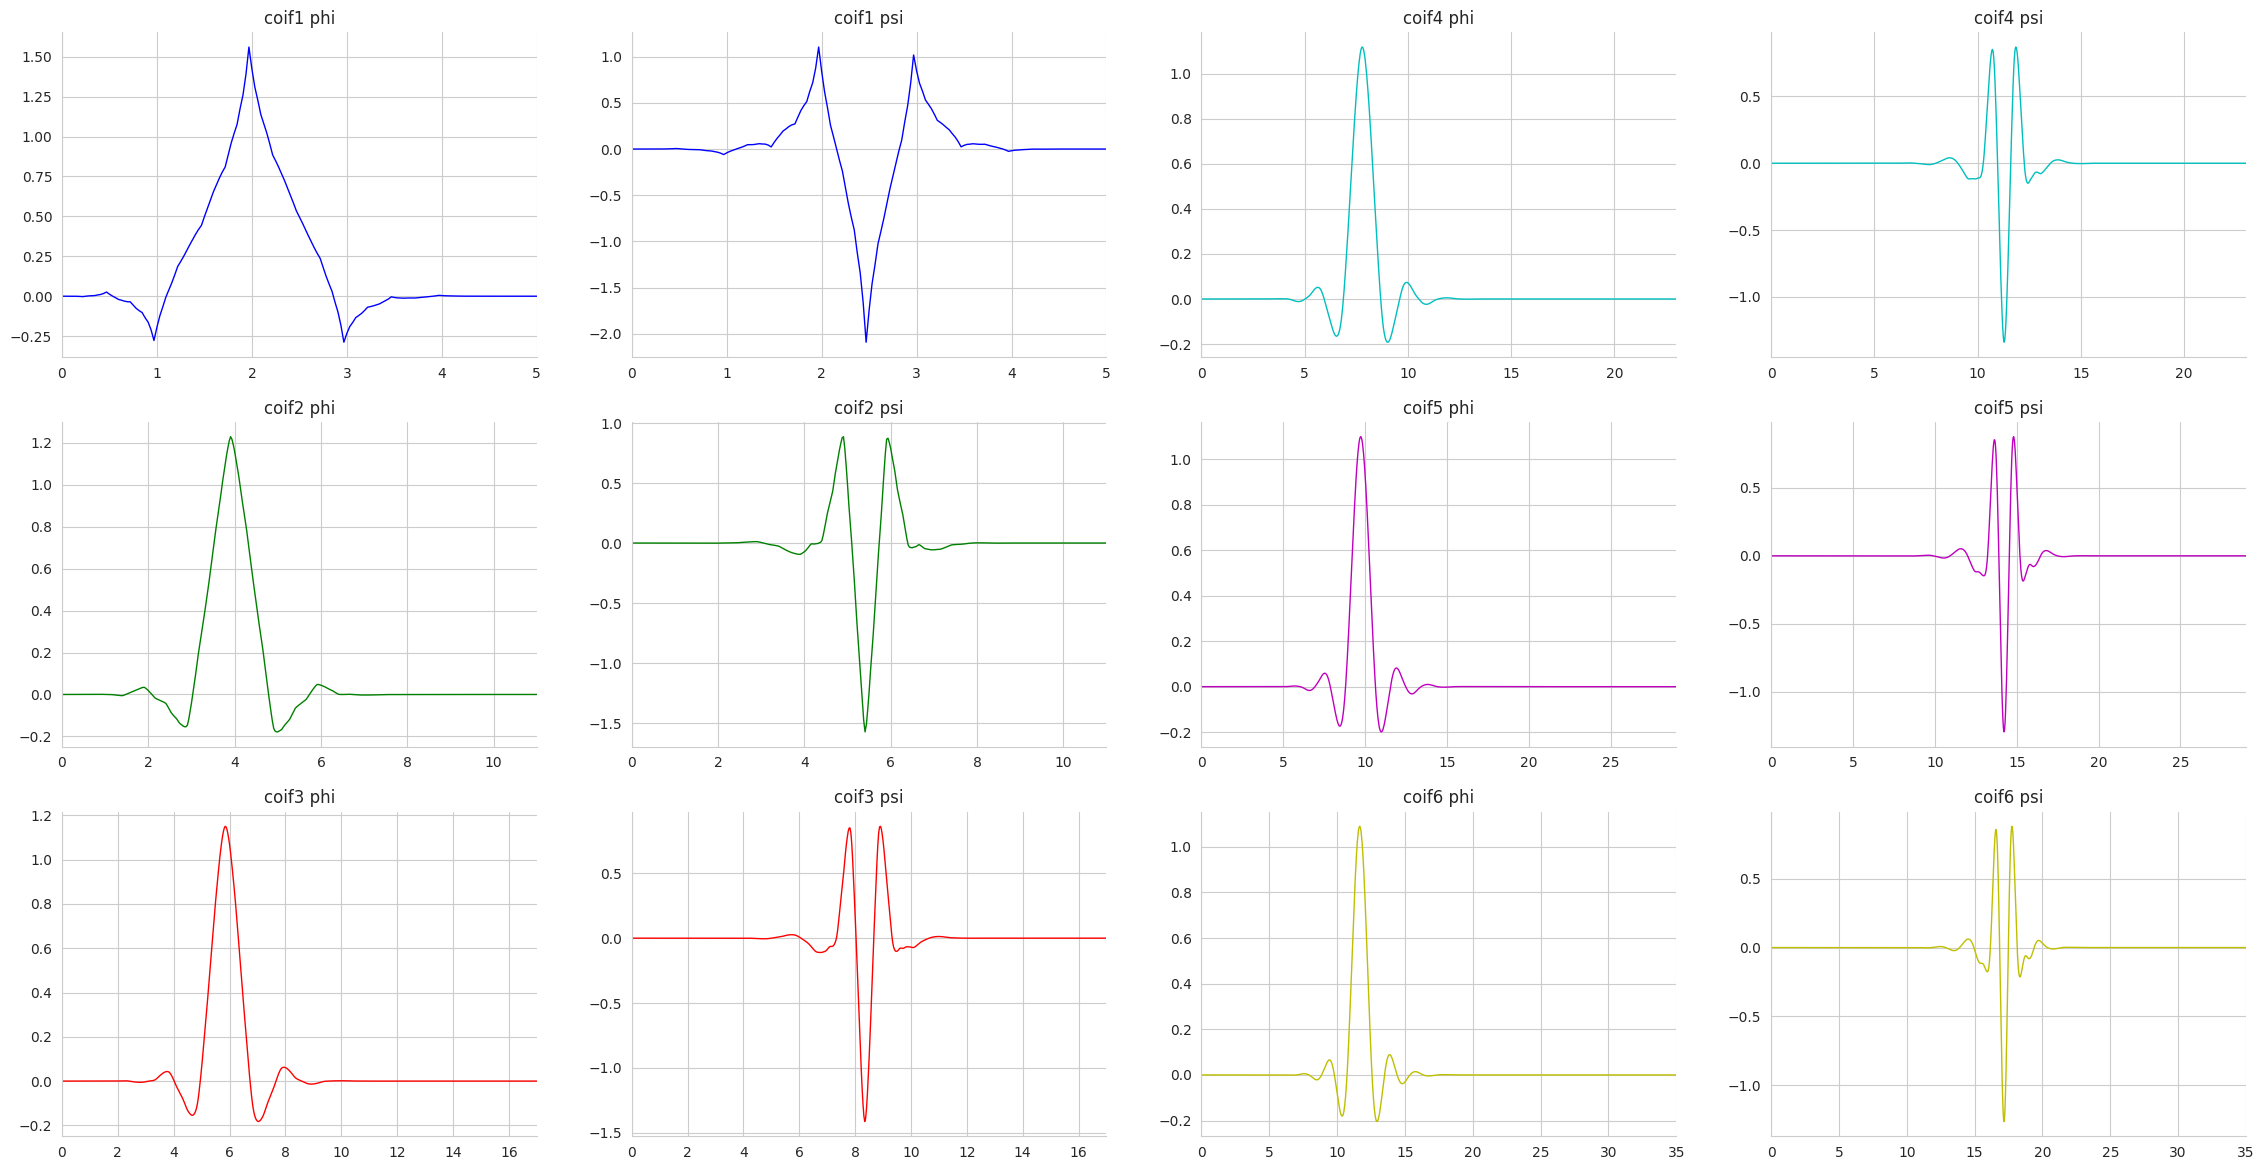

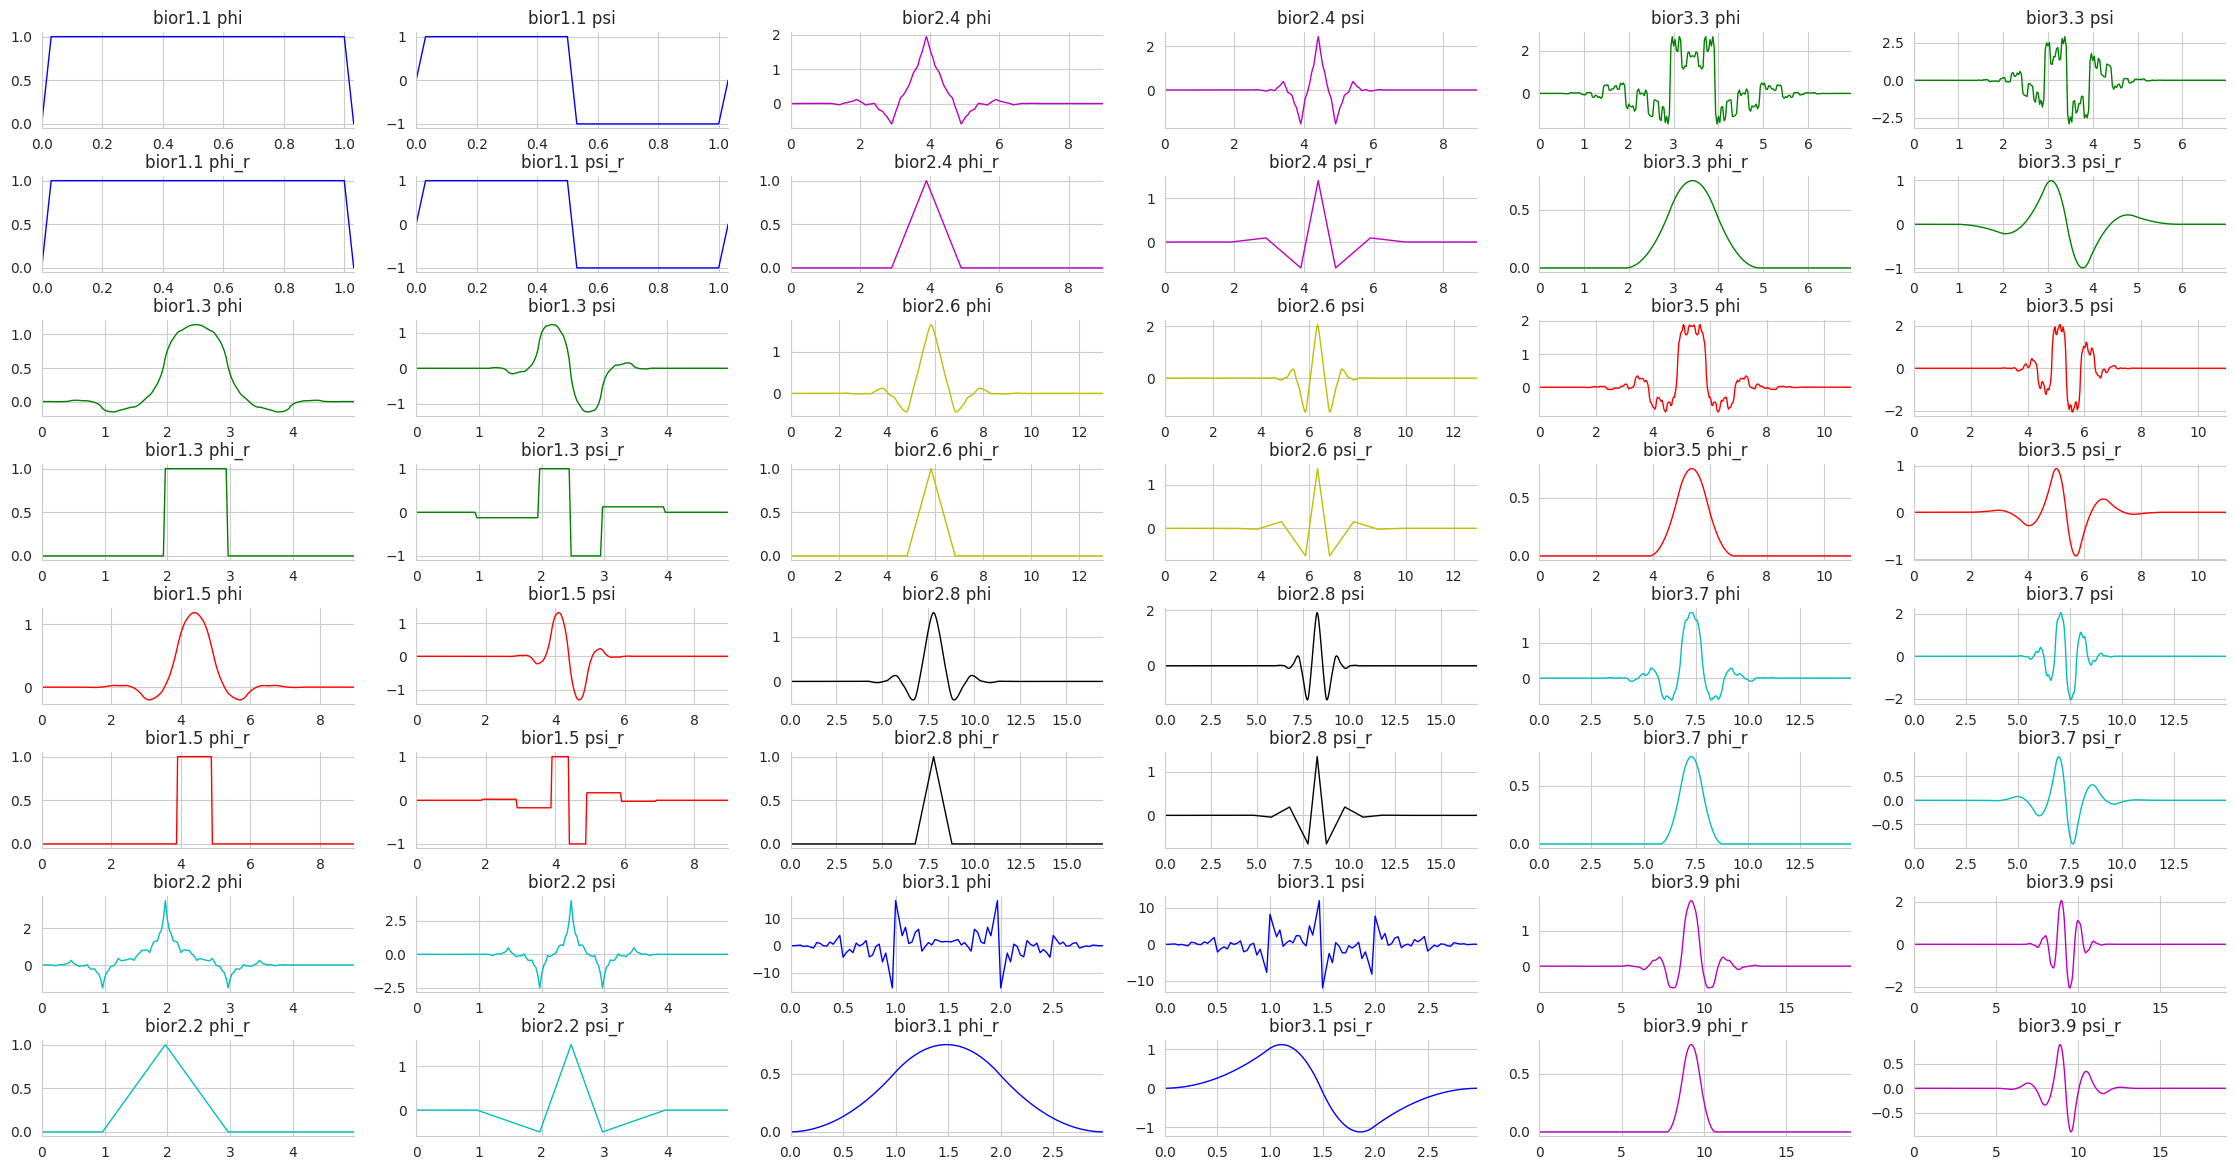

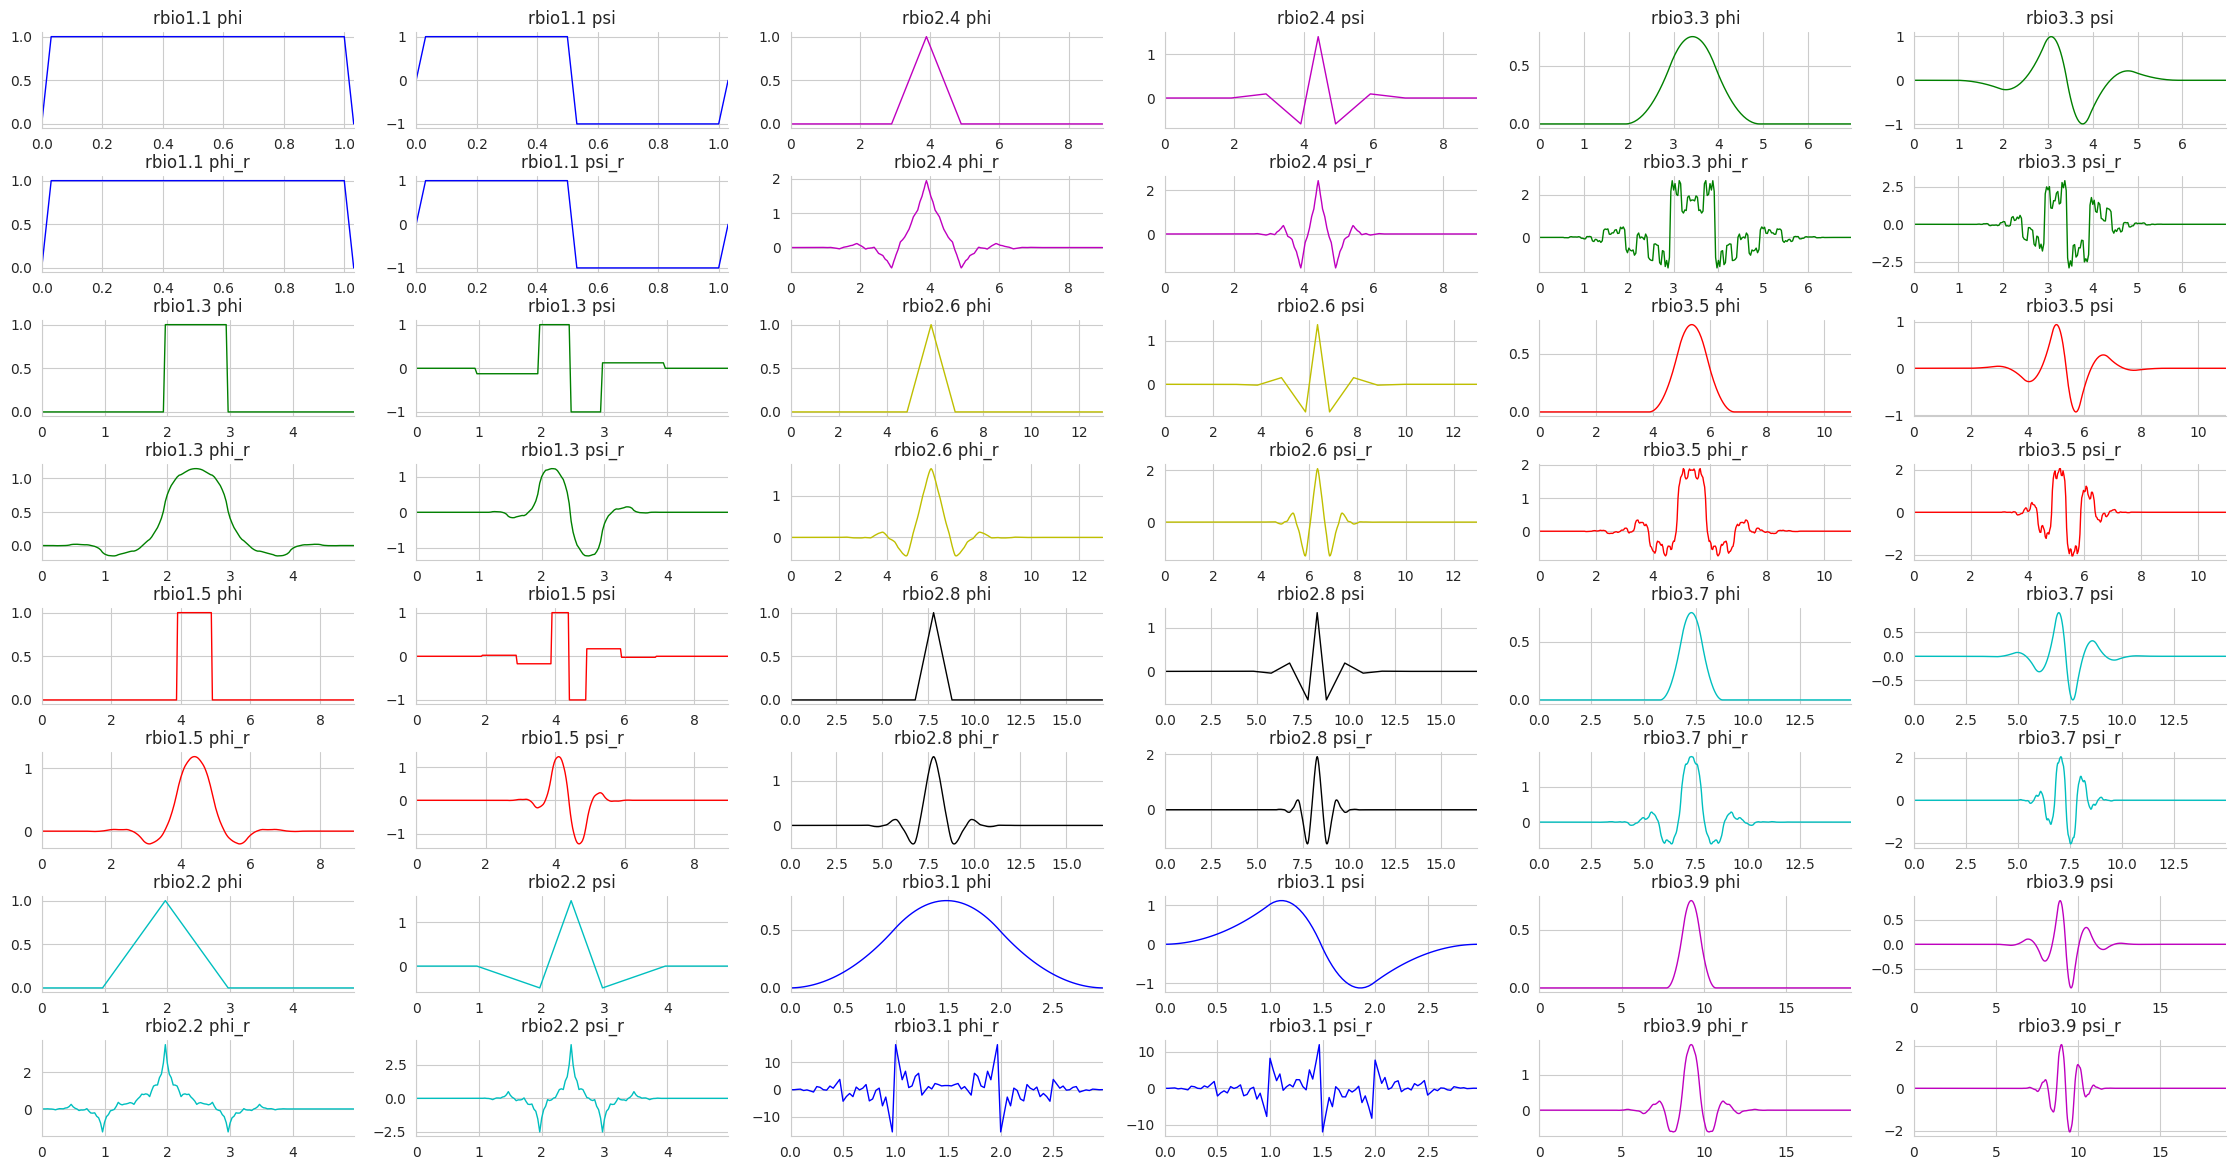

In [50]:
plot_data = [('db', (4, 3)),
             ('sym', (4, 3)),
             ('coif', (3, 2))]


for family, (rows, cols) in plot_data:
    fig = plt.figure(figsize=(24, 12))
    fig.subplots_adjust(hspace=0.2, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)
    colors = itertools.cycle('bgrcmyk')

    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, x = wavelet.wavefun(level=5)

            color = next(colors)
            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color, lw=1)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color, lw=1)
            ax.set_xlim(min(x), max(x))
    sns.despine()

for family, (rows, cols) in [('bior', (4, 3)), ('rbio', (4, 3))]:
    fig = plt.figure(figsize=(24, 12))
    fig.subplots_adjust(hspace=0.5, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)

    colors = itertools.cycle('bgrcmyk')
    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, phi_r, psi_r, x = wavelet.wavefun(level=5)
            row *= 2

            color = next(colors)
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color, lw=1)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 2*(1 + col + row*cols))
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color, lw=1)
            ax.set_xlim(min(x), max(x))

            row += 1
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi_r")
            ax.plot(x, phi_r, color, lw=1)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi_r")
            ax.plot(x, psi_r, color, lw=1)
            ax.set_xlim(min(x), max(x))
    sns.despine()

plt.show()

In [51]:
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

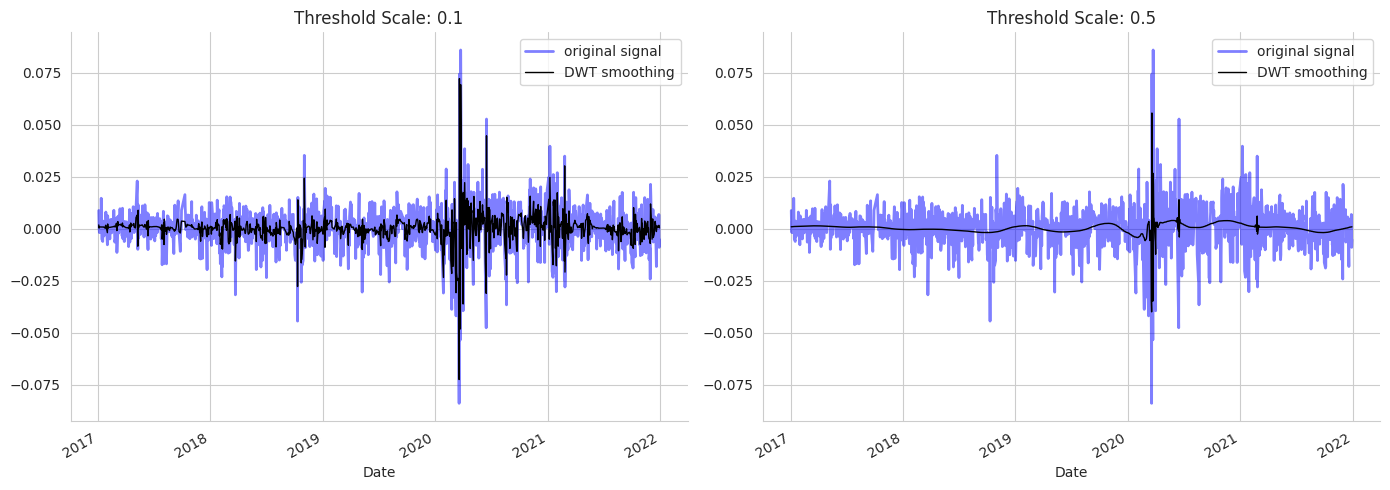

In [52]:
# sig = pd.read_csv("^KS11.csv")

# sig.Date = pd.to_datetime(sig.Date) # Change data type of 'Date'
# sig = sig.set_index('Date') # Set index

df1 = pd.read_csv("^KS11.csv")
df1.Date = pd.to_datetime(df1.Date)
df1 = df1.set_index('Date')




signal = (pd.read_csv("^KS11.csv")
          .Close.pct_change().dropna()
          )
signal.index = df1.index[1:]





fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

wavelet = "db6"
for i, scale in enumerate([.1, .5]):

    coefficients = pywt.wavedec(signal, wavelet, mode='per')
    coefficients[1:] = [pywt.threshold(i, value=scale*signal.max(), mode='soft') for i in coefficients[1:]]
    reconstructed_signal = pywt.waverec(coefficients, wavelet, mode='per')
    signal.plot(color="b", alpha=0.5, label='original signal', lw=2,
                 title=f'Threshold Scale: {scale:.1f}', ax=axes[i])
    pd.Series(reconstructed_signal, index=signal.index).plot(c='k', label='DWT smoothing', linewidth=1, ax=axes[i])
    axes[i].legend()
fig.tight_layout()
sns.despine();

In [54]:
reconstructed_signal

array([0.00097655, 0.00099489, 0.00101449, ..., 0.00090765, 0.00093405,
       0.00095433])